### Diamond Prediction data set

In [2]:
# import important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow


In [3]:
# import the data 
df = pd.read_csv("data/diamonds.csv")

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.index

RangeIndex(start=0, stop=53940, step=1)

In [8]:
df = df.drop(df[df['x'] == 0].index)
df = df.drop(df[df['y'] == 0].index)
df = df.drop(df[df['z'] == 0].index)

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
sns.pairplot(df)

In [ ]:
# "Regression Line on Price vs 'x'"
sns.regplot(data = df, x = 'price', y = 'x', fit_reg = True, scatter_kws ={'color' : "#17becf"})

<AxesSubplot:xlabel='price', ylabel='y'>

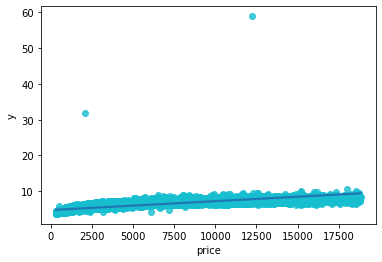

In [12]:
## "Regression Line on Price vs 'y'"
sns.regplot(data = df, x = 'price', y = 'y', fit_reg = True, scatter_kws ={'color' : "#17becf"})

<AxesSubplot:xlabel='price', ylabel='z'>

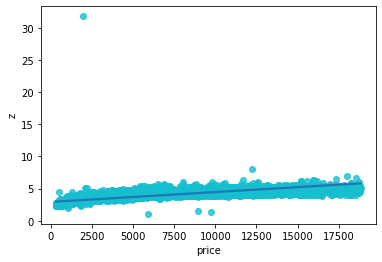

In [13]:
# "Regression Line on Price vs 'z'"
sns.regplot(data = df, x = 'price', y = 'z', fit_reg = True, scatter_kws ={'color' : "#17becf"})

In [1]:
# "Regression Line on Price vs 'depth'"
sns.regplot(data = df, x = 'price', y = 'depth', fit_reg = True, scatter_kws ={'color' : "#17becf"})

NameError: name 'sns' is not defined

<AxesSubplot:xlabel='price', ylabel='table'>

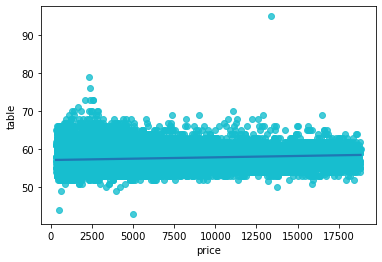

In [15]:
# "Regression Line on Price vs 'table'"
sns.regplot(data = df, x = 'price', y = 'table', fit_reg = True, scatter_kws ={'color' : "#17becf"})

<AxesSubplot:xlabel='price', ylabel='carat'>

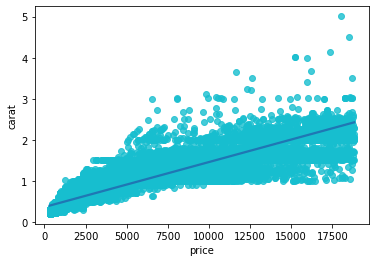

In [16]:

# "Regression Line on Price vs 'carat'"
sns.regplot(data = df, x = 'price', y = 'carat', fit_reg = True, scatter_kws ={'color' : "#17becf"})

In [17]:
#Dropping the outliers. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>50)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]


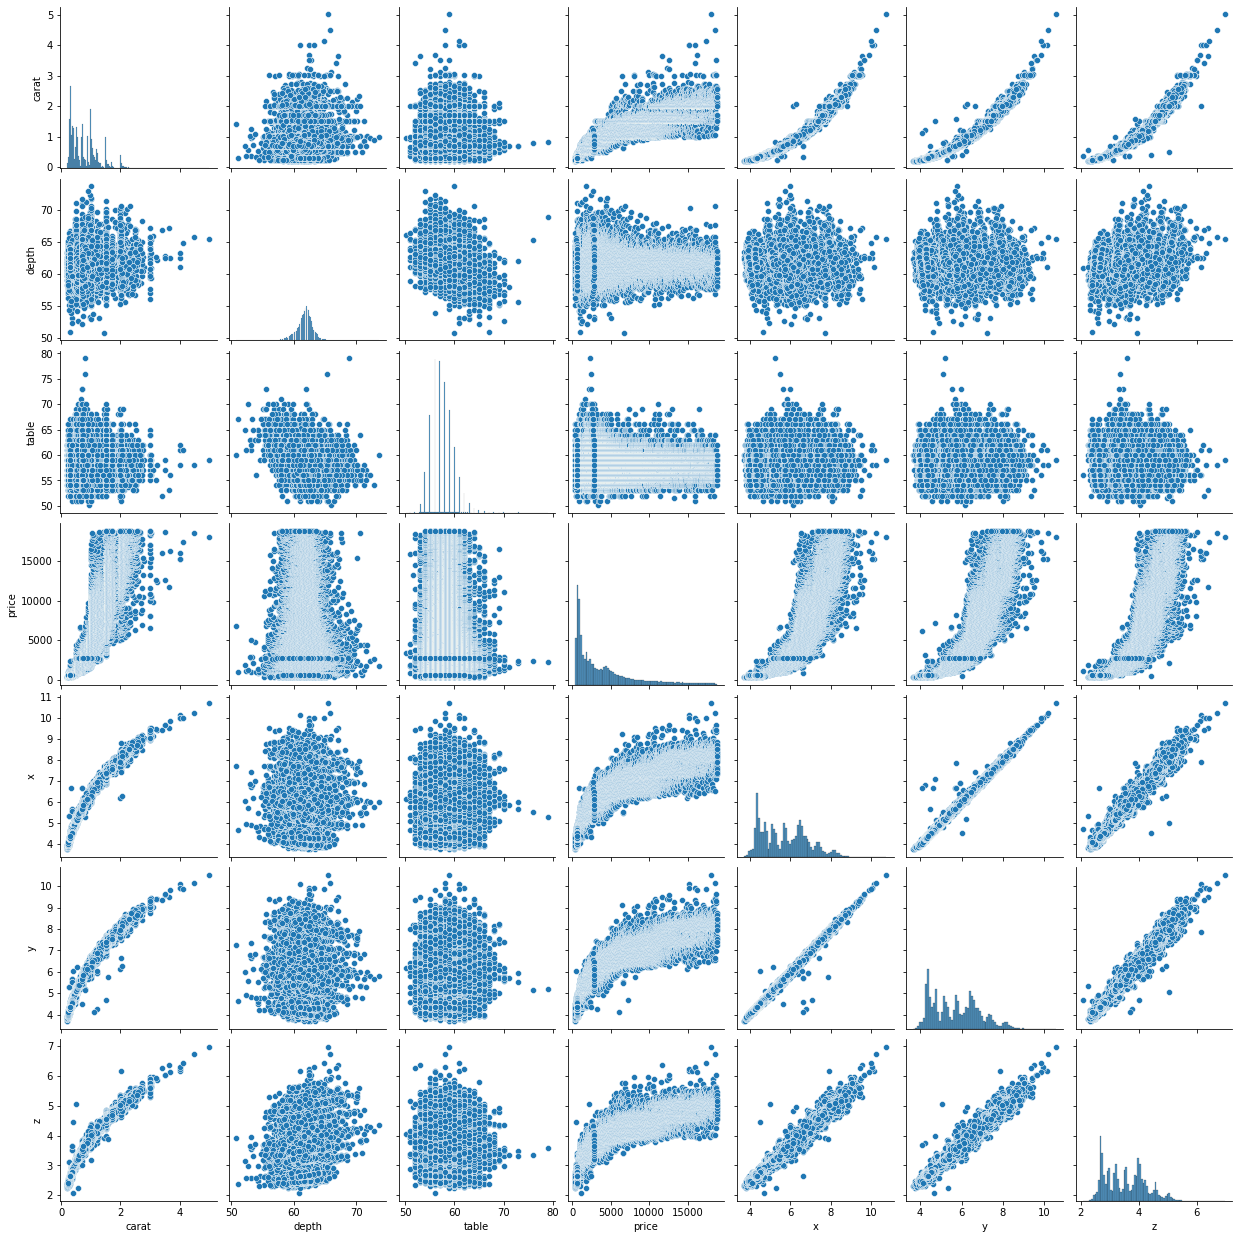

In [19]:
sns.pairplot(df)

In [20]:
# Find the x and y values and split the data
X = df.drop('price', axis = 1)
y = df['price']

In [21]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

In [27]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((13476, 9), (13476,), (40425, 9), (40425,))

In [29]:
# making the caterogical and numerical column seperately
X_train_cat = X_train.select_dtypes(include = ['object'])
X_train_num = X_train.select_dtypes(include = ['int64', 'float64'])


In [30]:
# as for categorical columns the data is comparitive so the columns are ordinal,  so we can use label encoding
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
20929
45265
52197
39316
42253


In [31]:
cut_le = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_le[x])

X_train_cat_le.head()    

,cut
20929,4
45265,4
52197,5
39316,4
42253,2


In [32]:
color_le = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_le[x])

X_train_cat_le.head()

,cut,color
20929,4,6
45265,4,5
52197,5,4
39316,4,7
42253,2,6


In [33]:
clarity_le = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_le[x])

X_train_cat_le.head()

,cut,color,clarity
20929,4,6,2
45265,4,5,4
52197,5,4,4
39316,4,7,6
42253,2,6,5


In [34]:
# numerical column trasformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns,
                                    index = X_train_num.index)
X_train_num_rescaled.head()

,carat,depth,table,x,y,z
20929,1.891262,-0.103806,-0.207273,1.689245,1.646096,1.642576
45265,-0.543401,-1.164938,-0.657498,-0.403789,-0.381579,-0.519801
52197,-0.207585,0.249905,0.242952,-0.047528,-0.094475,-0.044078
39316,-0.879216,-0.245290,-0.207273,-0.955994,-0.910928,-0.952277
42253,-0.690320,2.584396,-0.657498,-0.786770,-0.749432,-0.505385


In [36]:
# concatinate the dataframes
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)
# X_train_transformed = X_train_transformed.reset_index(drop = True)
X_train_transformed.shape

(40425, 9)

In [37]:

# preparing the test data in same way:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [38]:
# num columns
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns,
                                      index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table,x,y,z
32215,-1.026136,0.179163,-1.557947,-1.205377,-1.207005,-1.182930
40369,-0.711308,-0.457517,-1.107722,-0.679891,-0.650740,-0.707207
39666,-0.795262,0.320647,-1.557947,-0.813489,-0.839152,-0.793702
23219,1.912250,0.603616,-0.207273,1.715965,1.673012,1.786735
13614,0.422069,0.462131,0.693177,0.558116,0.614314,0.647883


In [39]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
32215
40369
39666
23219
13614


In [40]:
# categorical
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_le[x])
X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_le[x])
X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_le[x])
X_test_cat_le.head()

,cut,color,clarity
32215,4,4,7
40369,4,3,3
39666,4,4,4
23219,5,4,2
13614,3,6,3


In [41]:
# concatenate
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)
# X_test_transformed = X_test_transformed.reset_index(drop = True)
X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
32215,-1.026136,0.179163,-1.557947,-1.205377,-1.207005,-1.182930,4,4,7
40369,-0.711308,-0.457517,-1.107722,-0.679891,-0.650740,-0.707207,4,3,3
39666,-0.795262,0.320647,-1.557947,-0.813489,-0.839152,-0.793702,4,4,4
23219,1.912250,0.603616,-0.207273,1.715965,1.673012,1.786735,5,4,2
13614,0.422069,0.462131,0.693177,0.558116,0.614314,0.647883,3,6,3


In [45]:
# dump the standard scalar 
import pickle
pickle.dump(scaler, open('pickle_files/standard_scalar.pkl', 'wb'))

### start running the Experiment:

In [42]:
# import the models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [51]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")

mlflow.set_experiment("Diamond Price Prediction")

2022/09/21 19:52:39 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2022/09/21 19:52:39 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

<Experiment: artifact_location='./mlruns/1', creation_time=1663770159576, experiment_id='1', last_update_time=1663770159576, lifecycle_stage='active', name='Diamond Price Prediction', tags={}>

In [52]:
# training the LinearRegressor model
with mlflow.start_run():
    mlflow.set_tag("developer", "Adil")
    mlflow.set_tag("Algorithm", 'LinearRegression')
    linear_model = LinearRegression()
    linear_model.fit(X_train_transformed, y_train)
    y_test_pred = linear_model.predict(X_test_transformed)
    mse = mean_squared_error(y_test, y_test_pred)
    mlflow.log_metric("Mean_squared_error", mse)
    mlflow.sklearn.log_model(linear_model, artifact_path='models')
    mlflow.log_artifact('pickle_files/standard_scalar.pkl')

In [61]:
# training Knn model
with mlflow.start_run():
    mlflow.set_tag("developer", 'Adil')
    mlflow.set_tag('Algorithm', 'KNN')
    hyperparam = 9
    knn_model = KNeighborsRegressor(n_neighbors=hyperparam)
    knn_model.fit(X_train_transformed, y_train)
    y_test_pred = knn_model.predict(X_test_transformed)
    mse = mean_squared_error(y_test, y_test_pred)
    mlflow.log_param("n_neighbors", hyperparam)
    mlflow.log_metric('Mean_squared_error', mse)
    mlflow.sklearn.log_model(knn_model, artifact_path='models')
    mlflow.log_artifact('pickle_files/standard_scalar.pkl')

In [63]:
# random forest regressor
with mlflow.start_run():
    mlflow.set_tag("developer", 'Adil')
    mlflow.set_tag('Algorithm', 'RandomForestregressor')
    rfr_model = RandomForestRegressor()
    rfr_model.fit(X_train_transformed, y_train)
    y_test_pred = rfr_model.predict(X_test_transformed)
    mse = mean_squared_error(y_test, y_test_pred)
    mlflow.log_metric('Mean_squared_error', mse)
    mlflow.sklearn.log_model(rfr_model, artifact_path='models')
    mlflow.log_artifact('pickle_files/standard_scalar.pkl')

In [65]:
# decision tree
with mlflow.start_run():
    mlflow.set_tag("developer", 'Adil')
    mlflow.set_tag('Algorithm', 'Decisiontree')
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train_transformed, y_train)
    y_test_pred = dt_model.predict(X_test_transformed)
    mse = mean_squared_error(y_test, y_test_pred)
    mlflow.log_metric('Mean_squared_error', mse)
    mlflow.sklearn.log_model(dt_model, artifact_path='models')
    mlflow.log_artifact('pickle_files/standard_scalar.pkl')

In [70]:
# for the autologginf of all the model when we use the Grid search cv:
# as we got lowest mse for the random forest regressor we can use hyper param tunning for that
from sklearn.model_selection import RandomizedSearchCV

In [73]:
mlflow.sklearn.autolog(max_tuning_runs=None)
with mlflow.start_run():
#     set the parameter grid
    param_dist = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
    }
    reg_cv = RandomizedSearchCV(estimator=rfr_model,
                                n_iter=5,
                                cv = 5,
                                param_distributions = param_dist)
    reg_cv.fit(X_train_transformed, y_train)
#     disable the autologer
    mlflow.sklearn.autolog(disable=True)

2022/09/22 22:14:59 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\Adil Geelani\anaconda3\envs\Modules\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [74]:
reg_cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 110,
 'bootstrap': True}

In [75]:
y_test_pred = reg_cv.predict(X_test_transformed)
mean_squared_error(y_test, y_test_pred)

310623.8113917565